## Vizualizations

to understand how demand fluctuates by year, broken down by month, day of week, and different years

# viz functions
```
lineplt_oneplot(date_floor, # y-m-d-hr to start lineplot
                date_ceil,  # y-m-d-hr to end lineplot
                data,       # dataframe, (ex: df for all columns, df[['date_var',var1,'var2']] for just 2 columns
                date_var,   # name of date variable, in case all df is fed in or alternate date variable is used
                xspacing,   # for the date series, index positions to skip before a new X label is shown on map.
                # if you find theres way to many labels, increase the x spacing
                subtitle    # Describe measures, geography, dates are automatically included in title.
                )

lineplt: same parameters but individual line plots for df columns fed in


bar_month(data,measure, *args):

dataset, X column, additional arguments( like plt.savefig(...) or plt.title('...')

bar_day(data,measure, *args):

    same as above
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from my_functions import *
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime
parser = lambda x: datetime.strptime(x, '%Y%m%dT%HZ')

nrg = pd.read_csv('../data/erco_energy.csv', parse_dates=['datetime'], date_parser=parser)
fcast = pd.read_csv('../data/erco_forecast.csv', parse_dates=['datetime'], date_parser=parser)

In [3]:
print(f'{nrg.shape}')
print(f'{fcast.shape}')
print(nrg[['datetime']].head(5))
print(fcast[['datetime']].head(5))
print(nrg.tail(5)[['datetime']])
print(fcast.tail(5)[['datetime']])
print(f'{nrg.isnull().sum()}')
print(f'{fcast.isnull().sum()}')

(57786, 12)
(57745, 3)
             datetime
0 2022-02-03 23:00:00
1 2022-02-03 22:00:00
2 2022-02-03 21:00:00
3 2022-02-03 20:00:00
4 2022-02-03 19:00:00
             datetime
0 2022-02-04 06:00:00
1 2022-02-04 05:00:00
2 2022-02-04 04:00:00
3 2022-02-04 03:00:00
4 2022-02-04 02:00:00
                 datetime
57781 2015-07-01 10:00:00
57782 2015-07-01 09:00:00
57783 2015-07-01 08:00:00
57784 2015-07-01 07:00:00
57785 2015-07-01 06:00:00
                 datetime
57740 2015-07-01 10:00:00
57741 2015-07-01 09:00:00
57742 2015-07-01 08:00:00
57743 2015-07-01 07:00:00
57744 2015-07-01 06:00:00
datetime                 0
demand                 192
plant                    0
net_generation         209
coal                 26345
hydro                26345
natural_gas          26345
nuclear              26345
other                26345
solar                26345
wind                 26345
total_interchange      227
dtype: int64
datetime           0
forecast_demand    0
plant              0
d

In [4]:
viz2022 = nrg[nrg['datetime'].dt.to_period('Y') == '2022']
viz2021 = nrg[nrg['datetime'].dt.to_period('Y') == '2021']
viz2020 = nrg[nrg['datetime'].dt.to_period('Y') == '2020']
viz2019 = nrg[nrg['datetime'].dt.to_period('Y') == '2019']
viz2018 = nrg[nrg['datetime'].dt.to_period('Y') == '2018']
viz2022 = viz2022.drop(columns='net_generation')

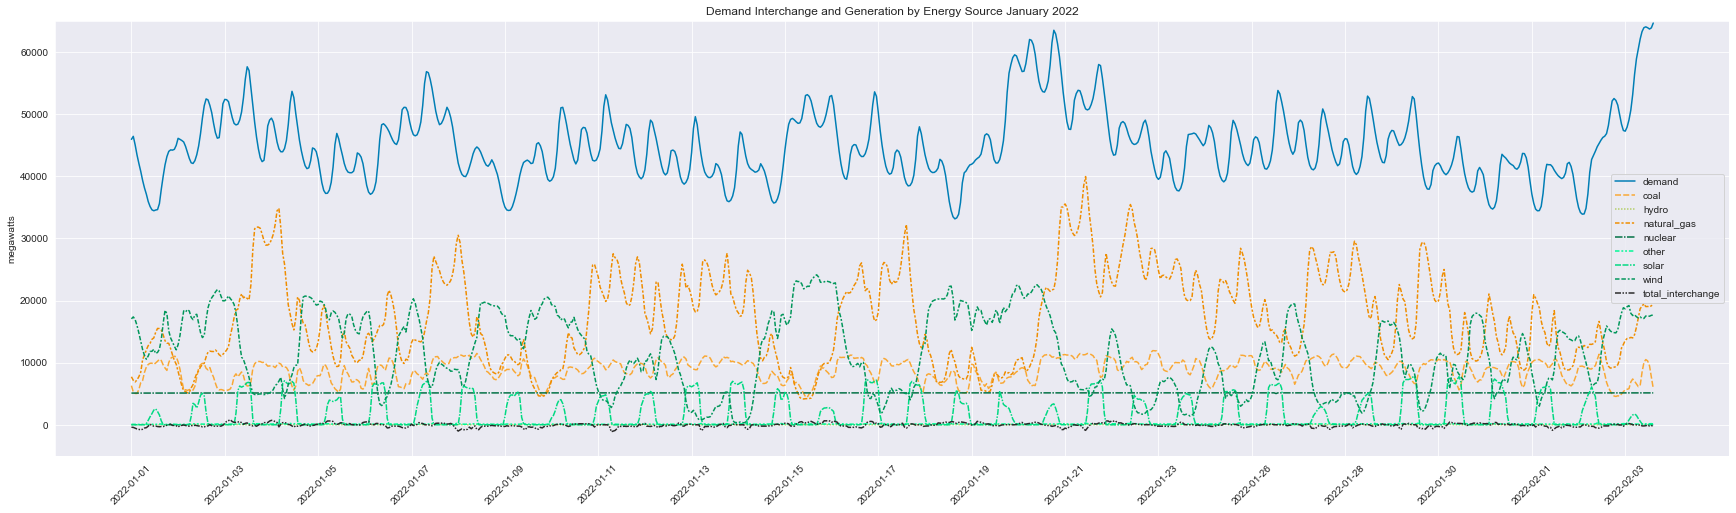

In [5]:
lineplt_oneplot(viz2022, 50, "Demand Interchange and Generation by Energy Source January 2022")

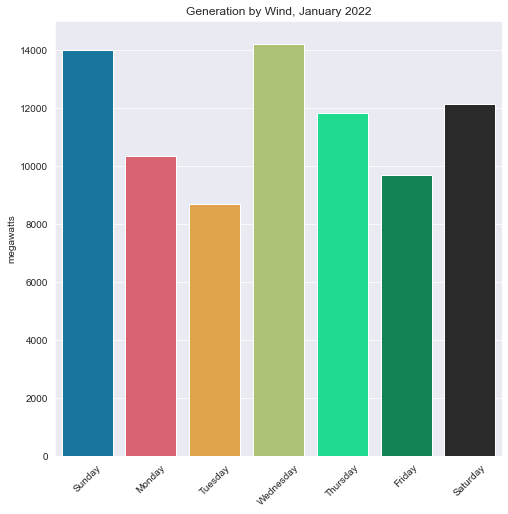

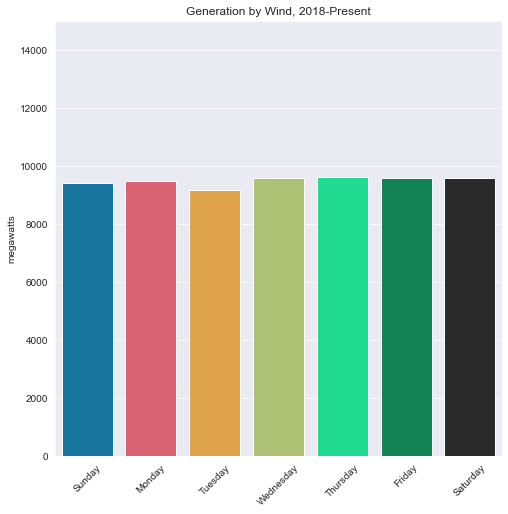

In [6]:
#bar_day(viz2022, 'demand',  '../output/bar_demand_day_2022.png','Demand for January 2022')
#bar_day(nrg, 'demand',  '../output/bar_demand_day_2021.png', 'Demand by Day of Week, 2018-2022')

bar_day(viz2022, 'wind', '../output/bar_generationwind_day_2022.png', 'Generation by Wind, January 2022')
bar_day(nrg, 'wind','../output/bar_generationwind_day_2021.png', 'Generation by Wind, 2018-Present')

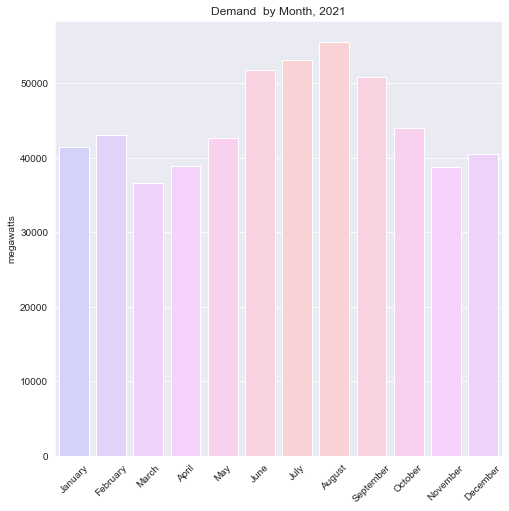

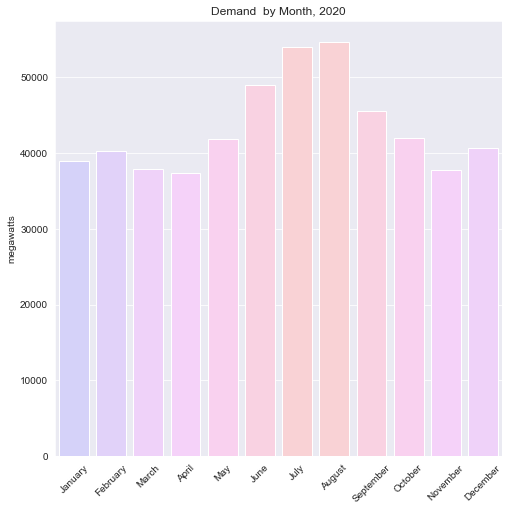

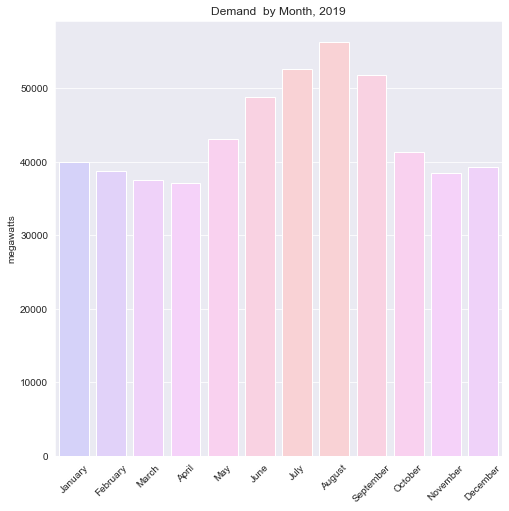

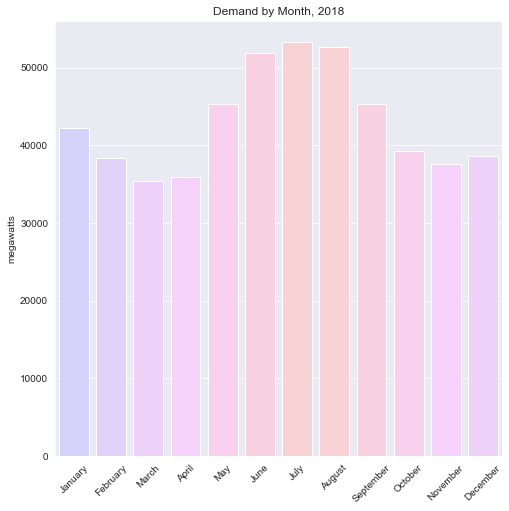

In [7]:
bar_month(viz2021, 'demand', '../output/bar_demand_month_2021.png', 'Demand  by Month, 2021')
bar_month(viz2020, 'demand','../output/bar_demand_month_2020.png', 'Demand  by Month, 2020')
bar_month(viz2019, 'demand','../output/bar_demand_month_2019.png', 'Demand  by Month, 2019')
bar_month(viz2018, 'demand', '../output/bar_demand_month_2018.png', 'Demand by Month, 2018')

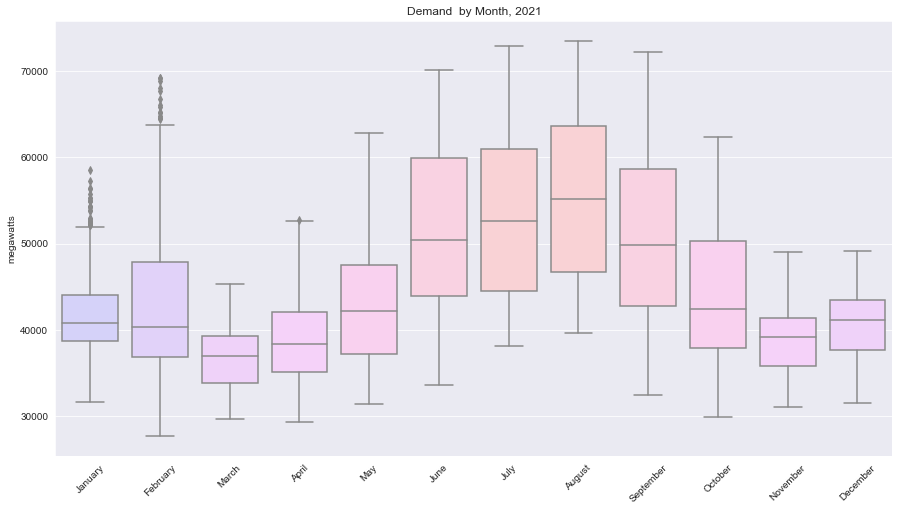

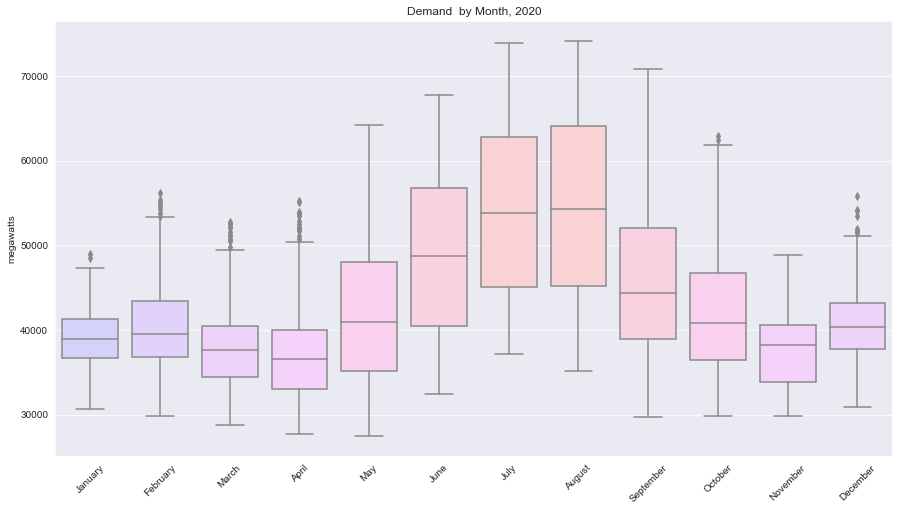

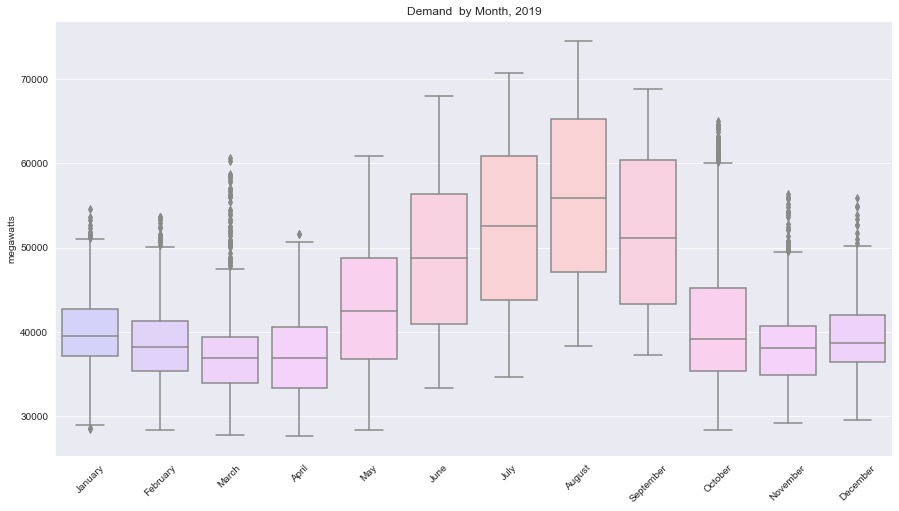

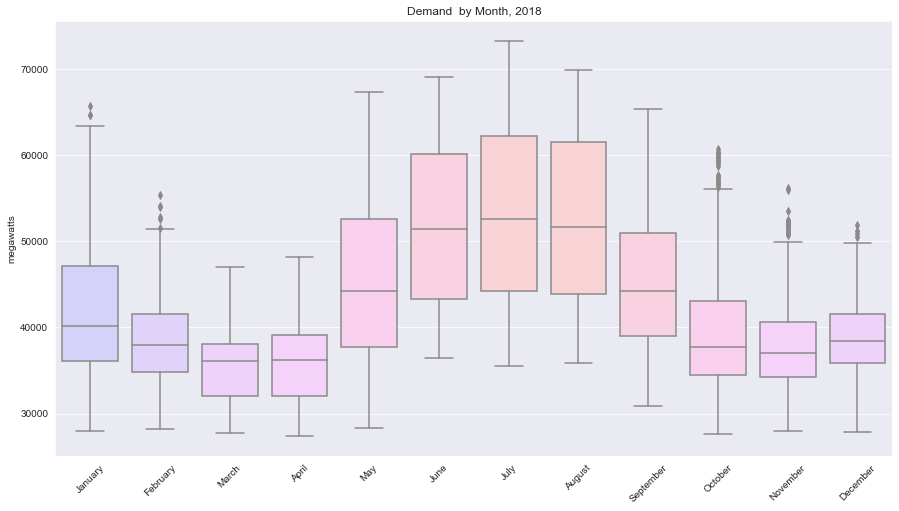

In [8]:
violin_month(viz2021, 'demand','../output/violin_demand_month_2021.png', 'Demand  by Month, 2021')
violin_month(viz2020, 'demand', '../output/violin_demand_month_2020.png', 'Demand  by Month, 2020')
violin_month(viz2019, 'demand', '../output/violin_demand_month_2019.png', 'Demand  by Month, 2019')
violin_month(viz2018, 'demand', '../output/violin_demand_month_2018.png', 'Demand  by Month, 2018')